In [1]:
%matplotlib inline

from numpy import arange
from matplotlib import pyplot as plt
from scipy.stats import norm
import pandas as pd

In [2]:
aerial=pd.read_csv("cleanbombww2 (1).csv")
aerial.head()

,Unnamed: 0,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Takeoff Base,Takeoff Location,...,Takeoff Longitude,Target Country,Target City,Target Latitude,Target Longitude,Airborne Aircraft,Bombing Aircraft,High Explosives Type,High Explosives Weight (Tons),Total Weight (Tons)
0,0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,PONTE OLIVO AIRFIELD,SICILY,...,14.321464,ITALY,SPADAFORA,38.22,15.37,20.0,20.0,500 LB GP (GP-M43/M64),10.0,10.0
1,1,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,PONTE OLIVO AIRFIELD,SICILY,...,14.321464,ITALY,COSENZA,39.27,16.25,18.0,36.0,500 LB GP (GP-M43/M64),9.0,9.0
2,2,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,PONTE OLIVO AIRFIELD,SICILY,...,14.321464,ITALY,GIOJA TAURO,38.43,15.90,15.0,15.0,500 LB GP (GP-M43/M64),7.5,7.5
3,3,96,8/16/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,PONTE OLIVO AIRFIELD,SICILY,...,14.321464,ITALY,VILLA SAN GIOVANNI,38.20,15.65,32.0,32.0,500 LB GP (GP-M43/M64),16.0,16.0
4,4,302,8/16/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,PONTE OLIVO AIRFIELD,SICILY,...,14.321464,ITALY,COSENZA,39.27,16.25,4.0,8.0,500 LB GP (GP-M43/M64),2.0,2.0


In [3]:
aerial.dtypes

Unnamed: 0                         int64
Mission ID                         int64
Mission Date                      object
Theater of Operations             object
Country                           object
Air Force                         object
Unit ID                           object
Aircraft Series                   object
Takeoff Base                      object
Takeoff Location                  object
Takeoff Latitude                 float64
Takeoff Longitude                float64
Target Country                    object
Target City                       object
Target Latitude                  float64
Target Longitude                 float64
Airborne Aircraft                float64
Bombing Aircraft                 float64
High Explosives Type              object
High Explosives Weight (Tons)    float64
Total Weight (Tons)              float64
dtype: object

In [4]:
aerial["Mission Date"]= pd.to_datetime(aerial["Mission Date"])
aerial = aerial.sort_values(by="Mission Date")
aerial.head()

,Unnamed: 0,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Takeoff Base,Takeoff Location,...,Takeoff Longitude,Target Country,Target City,Target Latitude,Target Longitude,Airborne Aircraft,Bombing Aircraft,High Explosives Type,High Explosives Weight (Tons),Total Weight (Tons)
333,333,112515,1941-12-10,PTO,USA,5 AF,19 BG,B17,CLARK FIELD,PHILLIPINES,...,120.560278,PHILIPPINE ISLANDS,APARRI,18.500000,121.61666,1.0,1.0,100 LB GP (GP-M30),0.95,0.95
339,339,112525,1941-12-10,PTO,USA,5 AF,19 BG,B17,CLARK FIELD,PHILLIPINES,...,120.560278,PHILIPPINE ISLANDS,APARRI,18.500000,121.61666,1.0,1.0,100 LB GP (GP-M30),1.00,1.00
338,338,112524,1941-12-10,PTO,USA,5 AF,19 BG,B17,CLARK FIELD,PHILLIPINES,...,120.560278,PHILIPPINE ISLANDS,VIGAN /LINGHAYEN GULF,17.583333,120.33330,5.0,5.0,100 LB GP (GP-M30),5.00,5.00
334,334,112516,1941-12-10,PTO,USA,5 AF,19 BG,B17,CLARK FIELD,PHILLIPINES,...,120.560278,PHILIPPINE ISLANDS,APARRI,18.500000,121.61666,2.0,2.0,600 LB GP (GP-M32),3.30,3.30
336,336,112518,1941-12-10,PTO,USA,5 AF,19 BG,B17,CLARK FIELD,PHILLIPINES,...,120.560278,PHILIPPINE ISLANDS,VIGAN /LINGHAYEN GULF,17.583333,120.33330,1.0,1.0,300 LB GP (GP-31),1.05,1.05


In [5]:
aerial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1109 entries, 333 to 948
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     1109 non-null   int64         
 1   Mission ID                     1109 non-null   int64         
 2   Mission Date                   1109 non-null   datetime64[ns]
 3   Theater of Operations          1109 non-null   object        
 4   Country                        1109 non-null   object        
 5   Air Force                      1109 non-null   object        
 6   Unit ID                        1109 non-null   object        
 7   Aircraft Series                1109 non-null   object        
 8   Takeoff Base                   1109 non-null   object        
 9   Takeoff Location               1109 non-null   object        
 10  Takeoff Latitude               1109 non-null   float64       
 11  Takeoff Longitud

In [6]:
aerial.drop('Unnamed: 0',axis='columns', inplace=True)

In [7]:
df=aerial.dropna(axis=0)

In [8]:
df.describe()

,Mission ID,Takeoff Latitude,Takeoff Longitude,Target Latitude,Target Longitude,Airborne Aircraft,Bombing Aircraft,High Explosives Weight (Tons),Total Weight (Tons)
count,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000
mean,105418.279531,35.128865,37.271261,32.421610,37.239412,16.122633,16.865645,11.007033,11.053387
std,54863.055496,127.076116,62.104179,10.894366,47.109914,15.353339,16.121576,11.151651,11.132265
min,1.000000,-13.055872,-177.328611,-8.800000,-179.451285,1.000000,0.000000,0.000000,0.000000
25%,44437.000000,26.905278,14.321464,28.353859,13.330000,6.000000,5.000000,3.000000,3.000000
50%,122117.000000,32.827131,15.005650,36.750000,15.630000,11.000000,12.000000,7.500000,7.500000
75%,143179.000000,40.421181,86.710700,40.840000,92.872628,23.500000,24.000000,15.000000,15.000000
max,178542.000000,4248.000000,1355.000000,46.780000,178.313736,141.000000,141.000000,70.500000,70.500000


In [9]:
df.mean()

C:\Users\dhruv\AppData\Local\Temp/ipykernel_13076/3698961737.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.mean()
C:\Users\dhruv\AppData\Local\Temp/ipykernel_13076/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Mission ID                       105418.279531
Takeoff Latitude                     35.128865
Takeoff Longitude                    37.271261
Target Latitude                      32.421610
Target Longitude                     37.239412
Airborne Aircraft                    16.122633
Bombing Aircraft                     16.865645
High Explosives Weight (Tons)        11.007033
Total Weight (Tons)                  11.053387
dtype: float64

D:\Ananconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


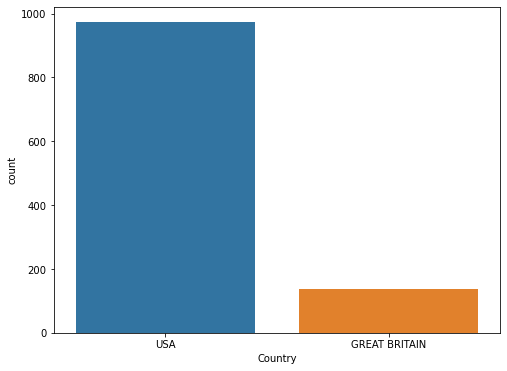

In [10]:
import seaborn as sns

plt.figure(figsize = (8,6))
sns.countplot(df.Country)
plt.show()

In [11]:
df['Aircraft Series'].value_counts()

A36         497
B25         218
B24         138
BLEN        113
B17         103
P40          10
LYSANDER      9
HUDSON        9
WELL          4
LB30          3
A24           3
B26           1
LIB           1
Name: Aircraft Series, dtype: int64

D:\Ananconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


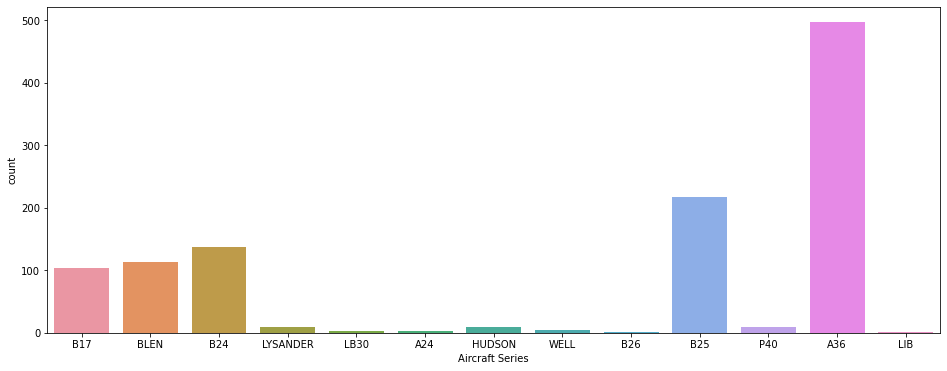

In [12]:
plt.figure(figsize = (16,6))
sns.countplot(df['Aircraft Series'])
plt.show()

D:\Ananconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


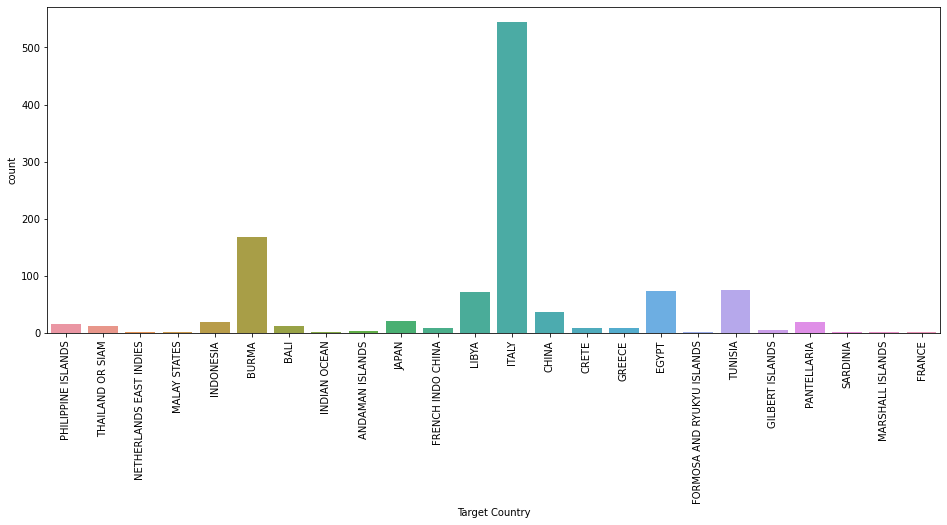

In [13]:
plt.figure(figsize=(16,6))
sns.countplot(df['Target Country'])
plt.xticks(rotation = 90)
plt.show()

D:\Ananconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


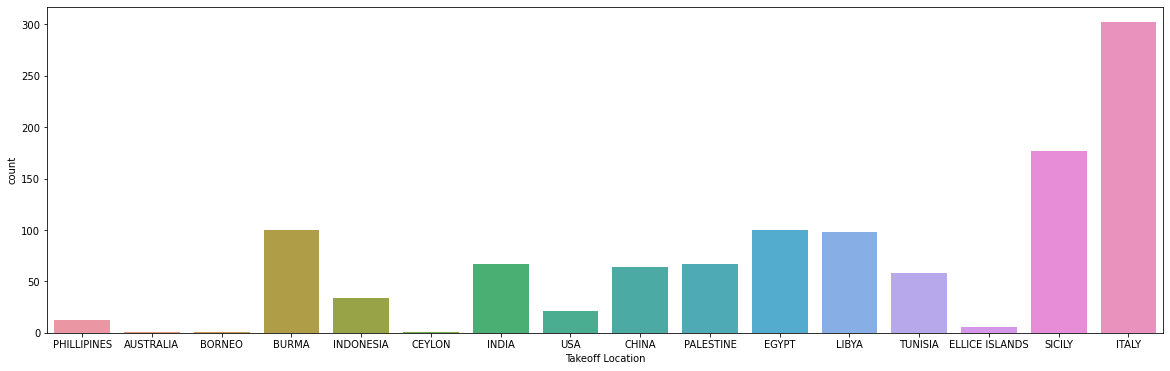

In [14]:
plt.figure(figsize = (20,6))
sns.countplot(df['Takeoff Location'])
plt.show()

In [15]:
data = df.groupby([pd.DatetimeIndex(df['Mission Date']).year,"Mission ID"]).size()
data

Mission Date  Mission ID
1941          112515        1
              112516        1
              112517        1
              112518        1
              112519        1
                           ..
1944          152822        1
              158613        1
              163720        1
              175414        1
1945          161203        1
Length: 1109, dtype: int64

<AxesSubplot:xlabel='Mission Date', ylabel='Mission ID'>

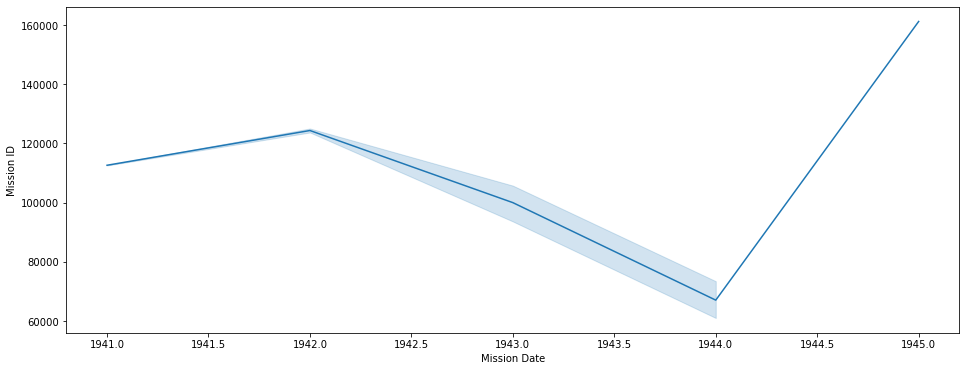

In [16]:
plt.figure(figsize=(16,6))
sns.lineplot(data=data, x="Mission Date", y="Mission ID")

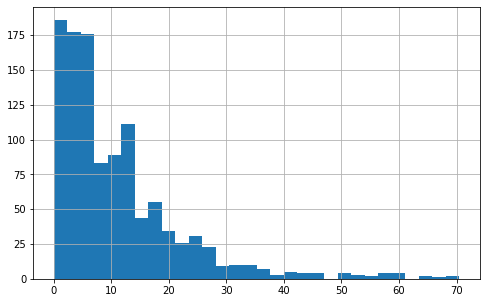

In [17]:
df['Total Weight (Tons)'].hist(bins=30, figsize=(8, 5));

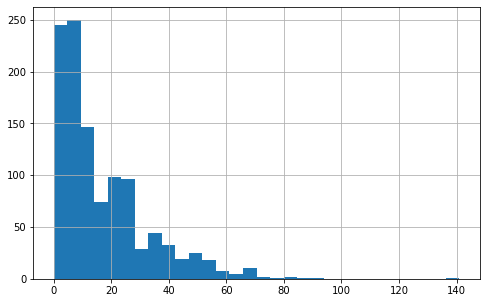

In [18]:
df['Bombing Aircraft'].hist(bins=30, figsize=(8, 5));